## Predicting housing prices with linear regression

In [1]:
import pandas as pd
import numpy as np

In [3]:
houses_df = pd.read_csv('housing_price_regression.csv')

### Dataset consists of 2051 homes, 5 features, and target

In [4]:
houses_df = houses_df[['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Garage Area', 
                       'Mas Vnr Area', 'SalePrice', 'target']]

In [8]:
houses_df.head()

,Overall Qual,Overall Cond,Gr Liv Area,Garage Area,Mas Vnr Area,SalePrice,target
0,6,8,1479,475.0,289.0,130500,130500
1,7,5,2122,559.0,132.0,220000,220000
2,5,7,1057,246.0,0.0,109000,109000
3,5,5,1444,400.0,0.0,174000,174000
4,6,8,1445,484.0,0.0,138500,138500


In [5]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 7 columns):
Overall Qual    2051 non-null int64
Overall Cond    2051 non-null int64
Gr Liv Area     2051 non-null int64
Garage Area     2051 non-null float64
Mas Vnr Area    2051 non-null float64
SalePrice       2051 non-null int64
target          2051 non-null int64
dtypes: float64(2), int64(5)
memory usage: 112.3 KB


In [6]:
houses_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall Qual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,5.562165,1.104497,1.0,5.0,5.0,6.0,9.0
Gr Liv Area,2051.0,1499.330083,500.447829,334.0,1129.0,1444.0,1728.5,5642.0
Garage Area,2051.0,473.440761,216.135102,0.0,319.0,480.0,576.0,1418.0
Mas Vnr Area,2051.0,98.626524,174.324690,0.0,0.0,0.0,159.0,1600.0
SalePrice,2051.0,181469.701609,79258.659352,12789.0,129825.0,162500.0,214000.0,611657.0
target,2051.0,181469.701609,79258.659352,12789.0,129825.0,162500.0,214000.0,611657.0


### Target is price

In [9]:
houses_df['SalePrice'].head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

In [10]:
y = houses_df['SalePrice']
X = houses_df.drop(columns=['SalePrice', 'target'])

### Train/test split

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [12]:
#predictions = {}
r2_train_mean = []
r2_test_mean = []


for test_size in np.linspace(.01, .99, 20):
    r2_train = []
    r2_test = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)

    lasso = LassoCV(cv = 5)
    lasso.fit(X_train_sc, y_train)

    r2_train.append(lasso.score(X_train_sc, y_train))
    r2_test.append(lasso.score(X_test_sc, y_test))
    
    r2_train_mean.append(np.mean(r2_train))
    r2_test_mean.append(np.mean(r2_test))
    #predictions[test_size] = lasso.predict(X_test)

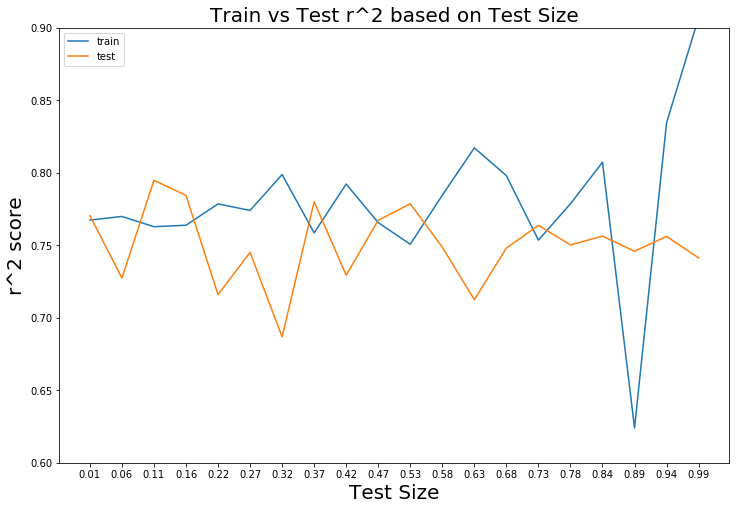

In [13]:
plt.figure(figsize = (12,8))
plt.title('Train vs Test r^2 based on Test Size', fontsize = 20)
plt.xticks(ticks = range(0,20), labels =  np.round(np.linspace(.01,.99,20), 2))
plt.xlabel('Test Size', fontsize = 20)
plt.ylabel('r^2 score', fontsize = 20)
plt.ylim([.6, .9])
plt.plot(r2_train_mean)
plt.plot(r2_test_mean)
plt.legend(labels = ['train', 'test']);

### Let's try with a smaller dataset

In [14]:
small_house_df = houses_df.sample(frac = .05)

In [15]:
small_house_df.shape

(103, 7)

In [16]:
y_small = houses_df['SalePrice']
X_small = houses_df.drop(columns=['SalePrice', 'target'])

In [17]:
#predictions = {}
r2_train_mean = []
r2_test_mean = []


for test_size in np.linspace(.01, .99, 20):
    r2_train = []
    r2_test = []
    
    X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size = test_size)

    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)

    lasso = LassoCV(cv = 5)
    lasso.fit(X_train_sc, y_train)

    r2_train.append(lasso.score(X_train_sc, y_train))
    r2_test.append(lasso.score(X_test_sc, y_test))
    
    r2_train_mean.append(np.mean(r2_train))
    r2_test_mean.append(np.mean(r2_test))
    #predictions[test_size] = lasso.predict(X_test)

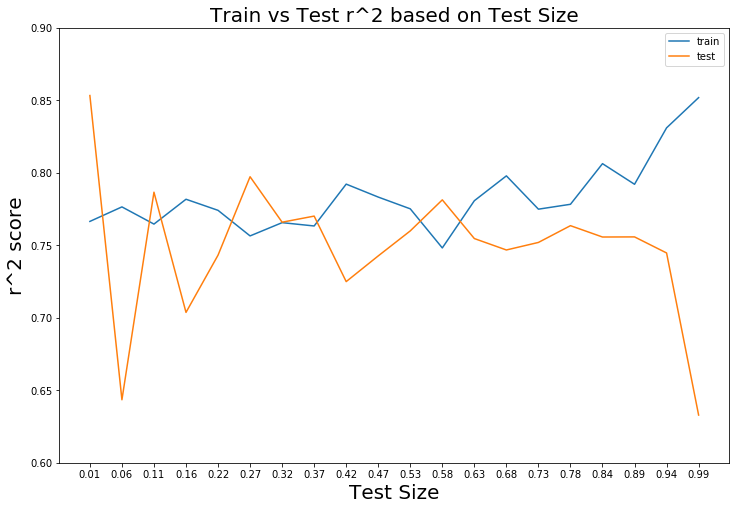

In [18]:
plt.figure(figsize = (12,8))
plt.title('Train vs Test r^2 based on Test Size', fontsize = 20)
plt.xticks(ticks = range(0,20), labels =  np.round(np.linspace(.01,.99,20), 2))
plt.xlabel('Test Size', fontsize = 20)
plt.ylabel('r^2 score', fontsize = 20)
plt.ylim([.6, .9])
plt.plot(r2_train_mean)
plt.plot(r2_test_mean)
plt.legend(labels = ['train', 'test']);

### Bring back dataset and use cross_validate

In [20]:
from sklearn.model_selection import cross_val_score, KFold
# KFold to do stratified random sampling

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .25)
# add param "stratify = y" for classifiction models. Will keep same split of target = 0/1 in both train/test sets

In [22]:
X_train_sc = ss.fit_transform(X_train) # use fit_transform for training data
X_test_sc = ss.transform(X_test) # only use transform on test data b/c you want to use the weights you used on the training data on your test data

In [23]:
lasso = Lasso()

In [24]:
# possible to use gridsearch 
all_accuracies = cross_val_score(estimator = lasso, X = X_train, y = y_train, cv = 10, n_jobs = -1)
# n_jobs = -1: all cores
# n_jobs = -2: all cores except last
# cv: number of splits in training data for cross validation 
# default to ~ 5 cross folds

In [25]:
all_accuracies # reports R-squared for all cross-validations
# People usually report the mean of results 

array([0.81089704, 0.78289057, 0.7340133 , 0.77349716, 0.76393027,
       0.80909877, 0.82207781, 0.70201183, 0.53832237, 0.7218034 ])

In [26]:
all_accuracies.mean()

0.7458542523023043

In [27]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
lasso.score(X_test, y_test)

0.801801115716231

In [29]:
from sklearn.model_selection import cross_validate

all_scores = cross_validate(estimator = lasso, X = X_train, y = y_train, 
                            cv = 10, n_jobs = -1, scoring = ['r2'])

all_scores

{'fit_time': array([0.00790119, 0.00541782, 0.00555992, 0.00667715, 0.00483775,
        0.00497103, 0.00467491, 0.00406623, 0.00353909, 0.00280023]),
 'score_time': array([0.00440407, 0.00203824, 0.00206518, 0.01020002, 0.00489306,
        0.00197506, 0.00187111, 0.00237179, 0.00112391, 0.00156188]),
 'test_r2': array([0.81089704, 0.78289057, 0.7340133 , 0.77349716, 0.76393027,
        0.80909877, 0.82207781, 0.70201183, 0.53832237, 0.7218034 ])}

### Gridsearch

In [30]:
# apply different hyperparameters to select best model to use

from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {
    'alpha': [.1, .5, 1, 2, 5, 10, 20, 100, 200, 1000, 5000],
    'tol': [.001, .01, .1, 1, 10],
    'max_iter' : [5, 10, 50, 100]
}

In [32]:
gs = GridSearchCV(estimator = lasso, param_grid = param_grid)

In [33]:
gs.fit(X_train_sc, y_train)

/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 842076580048.8784, tolerance: 6574465870.086247
  positive)
/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 849310602574.2511, tolerance: 6458867118.381154
  positive)
/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_mod

/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 837710758175.3903, tolerance: 6574465870.086247
  positive)
/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 844898836620.6923, tolerance: 6458867118.381154
  positive)
/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 662422862602.1576, tolerance: 6419510185.723164
  positive)
/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklear

/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 818138298248.9442, tolerance: 6574465870.086247
  positive)
/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 825141317133.5007, tolerance: 6458867118.381154
  positive)
/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 646332858764.0376, tolerance: 6419510185.723164
  positive)
/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklear

/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 742274341225.4498, tolerance: 6574465870.086247
  positive)
/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 748880619985.45, tolerance: 6458867118.381154
  positive)
/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 584115392183.8672, tolerance: 6419510185.723164
  positive)
/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 0.5, 1, 2, 5, 10, 20, 100, 200, 1000,
                                   5000],
                         'max_iter': [5, 10, 50, 100],
                         'tol': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
gs.score(X_test_sc, y_test)

0.8005291508196002

In [35]:
gs.best_params_

{'alpha': 1000, 'max_iter': 5, 'tol': 0.1}

In [36]:
gs.cv_results_

{'mean_fit_time': array([0.0026207 , 0.00195638, 0.00194661, 0.00122857, 0.0009896 ,
        0.0014805 , 0.0012664 , 0.00130033, 0.00113734, 0.00081094,
        0.0009102 , 0.0013353 , 0.0009834 , 0.00081372, 0.0008107 ,
        0.00095709, 0.00098236, 0.00102472, 0.00092832, 0.00105532,
        0.00123692, 0.00108878, 0.00120568, 0.00083899, 0.0009226 ,
        0.00118502, 0.00131798, 0.00112486, 0.00132934, 0.0009706 ,
        0.00103235, 0.00104364, 0.00141581, 0.00108274, 0.0009613 ,
        0.00130645, 0.0017523 , 0.00117087, 0.00107296, 0.00083637,
        0.00117222, 0.00152707, 0.00114703, 0.00098999, 0.00089765,
        0.00122921, 0.00111922, 0.00112828, 0.00094024, 0.00082676,
        0.00085465, 0.00087865, 0.0009443 , 0.00089534, 0.00098308,
        0.00086069, 0.0008866 , 0.00087873, 0.00098411, 0.00086164,
        0.00106525, 0.00111508, 0.00112542, 0.00110396, 0.00097609,
        0.00115259, 0.00112478, 0.00089963, 0.00100652, 0.00093953,
        0.00088104, 0.00107368,

In [37]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,param_tol,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002621,0.001414,0.001558,0.000629,0.1,5,0.001,"{'alpha': 0.1, 'max_iter': 5, 'tol': 0.001}",0.778488,0.792530,0.675073,0.748745,0.052358,51
1,0.001956,0.000857,0.001244,0.000326,0.1,5,0.01,"{'alpha': 0.1, 'max_iter': 5, 'tol': 0.01}",0.778488,0.792530,0.675073,0.748745,0.052358,51
2,0.001947,0.000507,0.001494,0.000737,0.1,5,0.1,"{'alpha': 0.1, 'max_iter': 5, 'tol': 0.1}",0.778488,0.792530,0.675073,0.748745,0.052358,51
3,0.001229,0.000307,0.000794,0.000228,0.1,5,1,"{'alpha': 0.1, 'max_iter': 5, 'tol': 1}",0.770240,0.778498,0.663694,0.737525,0.052265,173
4,0.000990,0.000150,0.000628,0.000090,0.1,5,10,"{'alpha': 0.1, 'max_iter': 5, 'tol': 10}",0.721836,0.719130,0.633107,0.691395,0.041191,217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.000904,0.000104,0.000558,0.000008,5000,100,0.001,"{'alpha': 5000, 'max_iter': 100, 'tol': 0.001}",0.760158,0.784727,0.689962,0.744985,0.040143,130
216,0.000950,0.000172,0.000563,0.000013,5000,100,0.01,"{'alpha': 5000, 'max_iter': 100, 'tol': 0.01}",0.760433,0.784678,0.689816,0.745011,0.040229,127
217,0.000885,0.000083,0.000578,0.000014,5000,100,0.1,"{'alpha': 5000, 'max_iter': 100, 'tol': 0.1}",0.762573,0.786081,0.689092,0.745952,0.041299,121
218,0.000824,0.000012,0.000553,0.000003,5000,100,1,"{'alpha': 5000, 'max_iter': 100, 'tol': 1}",0.760207,0.783600,0.682075,0.742000,0.043396,133


### Pipelines

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

In [39]:
scaler = StandardScaler()
pca = PCA()
knn = KNeighborsRegressor()

In [40]:
pipe = Pipeline(steps = [('scaler', scaler), ('pca', pca), ('knn', knn)])
# list of tuples with self-defined name and the instantiated object

In [41]:
param_grid = {
    'pca__n_components' : [2, 3, 4, 5],
    'knn__algorithm' : ['auto', 'ball_tree', 'brute', 'kd_tree'],
    'knn__n_neighbors' : [5, 9, 11, 13, 15, 17, 21, 25, 29],
    'knn__weights' : ['uniform', 'distance']
}
# Syntax: use pipeline STRING name, double underscore __, parameter that you want to edit
# If you are just using one defined value, you can just define it when you instantiate the object

In [42]:
gs_pipe = GridSearchCV(pipe, param_grid, cv = 5, scoring='r2')

In [43]:
gs_pipe.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('knn',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            me

In [44]:
# R-squared is default, but can add other metrics when you instantiate gs_pipe
gs_pipe.score(X_test, y_test)

0.8330194286604802

In [46]:
gs_pipe.best_params_

{'knn__algorithm': 'auto',
 'knn__n_neighbors': 17,
 'knn__weights': 'distance',
 'pca__n_components': 5}

In [45]:
pd.DataFrame(gs_pipe.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__algorithm,param_knn__n_neighbors,param_knn__weights,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011509,0.012259,0.003527,0.002432,auto,5,uniform,2,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",0.812948,0.761053,0.800896,0.816241,0.692601,0.776777,0.046403,285
1,0.005580,0.000409,0.002550,0.000099,auto,5,uniform,3,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",0.824775,0.740497,0.786730,0.829313,0.729619,0.782190,0.041356,249
2,0.004769,0.000333,0.003023,0.000352,auto,5,uniform,4,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",0.828818,0.747368,0.771364,0.819102,0.720098,0.777360,0.041472,282
3,0.004232,0.000066,0.003227,0.000129,auto,5,uniform,5,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",0.845664,0.761790,0.800931,0.811845,0.740822,0.792231,0.037105,114
4,0.007325,0.000946,0.003152,0.000456,auto,5,distance,2,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",0.803953,0.760509,0.791763,0.838828,0.730820,0.785175,0.036952,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.004453,0.000184,0.005202,0.000105,kd_tree,29,uniform,5,"{'knn__algorithm': 'kd_tree', 'knn__n_neighbor...",0.828915,0.767497,0.787893,0.811828,0.756765,0.790588,0.026848,142
284,0.006340,0.001600,0.004232,0.000750,kd_tree,29,distance,2,"{'knn__algorithm': 'kd_tree', 'knn__n_neighbor...",0.837825,0.765591,0.801212,0.842888,0.743577,0.798225,0.039031,57
285,0.005460,0.000585,0.004413,0.000804,kd_tree,29,distance,3,"{'knn__algorithm': 'kd_tree', 'knn__n_neighbor...",0.843882,0.761109,0.811988,0.828228,0.734857,0.796032,0.041324,70
286,0.005315,0.000940,0.005573,0.000964,kd_tree,29,distance,4,"{'knn__algorithm': 'kd_tree', 'knn__n_neighbor...",0.839061,0.756049,0.792545,0.815253,0.746388,0.789871,0.034944,165


## Trying to use RandomizedSearch to use random hyperparameter values

In [47]:
from sklearn.model_selection import RandomizedSearchCV